# Estimation on simulated data using MSM

In [1]:
from consav import runtools
runtools.write_numba_config(disable=0,threads=4)

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Local modules
from Model import RetirementClass
import figs
import SimulatedMinimumDistance as SMD

# Global modules
import numpy as np
import time
import matplotlib.pyplot as plt

# Singles

In [2]:
Single = RetirementClass(simN=int(1e5),simT=68-57+1)
Single.solve()
Single.simulate()

### Simulate data

In [3]:
shape = (11,8)

In [4]:
mom_data = SMD.MomFunSingle(Single)
mm = mom_data.reshape(shape)
mom_se = SMD.MomFunSingle(Single,calc='std')
weight = SMD.weight_matrix_single(mom_se,shape,factor=[1/10,1/10,1,1,1,1,1,1,1,1/2,1/3])
ww = np.diag(weight).reshape(shape)

Weight matrix

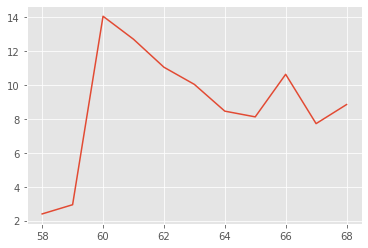

In [5]:
plt.plot(np.arange(58,69),np.mean(ww,axis=1))
plt.show()

Moments

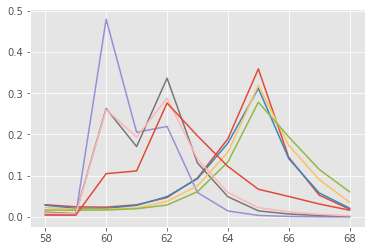

In [6]:
plt.plot(np.arange(58,69), mm)
plt.show()

### Set up model for estimation

In [7]:
Single.par.sim_seed = Single.par.sim_seed + 100 # set new seed for estimation
Single.recompute()

In [8]:
# function to generate moments
def mom_fun(Single):
    return SMD.MomFunSingle(Single)

In [9]:
par = Single.par
true = np.array([par.alpha_0_male, par.alpha_0_female, par.alpha_1, par.sigma_eta])
est_par = ["alpha_0_male", "alpha_0_female", "alpha_1", "sigma_eta"]

# Setup estimation
smd = SMD.SimulatedMinimumDistance(Single,mom_data,mom_fun)
smd.est_par = est_par

### Run estimation

In [10]:
true

array([0.4  , 0.4  , 0.053, 0.435])

In [11]:
theta0 = SMD.start(10,bounds=[(0.1,1.0), (0.1,1.0), (-1.0,1.0), (0.1,1.0)])
theta0[0] = list(true)

In [12]:
smd.MultiStart(theta0,weight)
theta = smd.est

1 estimation:
success: True | feval: 45 | time: 0.6 min | obj: 0.006442150995008042
start par: [0.4, 0.4, 0.053, 0.435]
par:       [0.40119764 0.40420859 0.05312809 0.44075831]

2 estimation:
success: True | feval: 189 | time: 2.6 min | obj: 0.006246777496728611
start par: [0.649, 0.241, 0.388, 0.927]
par:       [0.40290408 0.40492348 0.05246627 0.44282838]

3 estimation:
success: True | feval: 158 | time: 2.2 min | obj: 0.006389641786319818
start par: [0.482, 0.535, -0.474, 0.972]
par:       [0.40166519 0.40437802 0.05334801 0.44176037]

4 estimation:
success: True | feval: 189 | time: 2.6 min | obj: 0.006221358086381173
start par: [0.459, 0.897, -0.788, 0.578]
par:       [0.40146412 0.40326824 0.05331418 0.44098201]

5 estimation:
success: True | feval: 204 | time: 2.9 min | obj: 0.006295397494806711
start par: [0.598, 0.788, 0.955, 0.709]
par:       [0.40144271 0.40335322 0.05353276 0.44036421]

6 estimation:
success: True | feval: 196 | time: 2.8 min | obj: 0.006342915259697083
sta

In [13]:
print('par :', est_par)
print('bias:', theta-true)

par : ['alpha_0_male', 'alpha_0_female', 'alpha_1', 'sigma_eta']
bias: [-0.00121607  0.00053276  0.00093263  0.00175803]


### clean up (to save memory)

In [14]:
del Single

# Couples

In [17]:
#CoupleEst,SingleEst = SMD.load_est(name='Couple',couple=True)
#CoupleEst['simT'] = 68-53+1
#CoupleEst['simN'] = int(1e5)
#Couple = RetirementClass(couple=True, single_kwargs=SingleEst, **CoupleEst)
Couple = RetirementClass(couple=True, simT=68-53+1)
Couple.solve()
Couple.simulate()

### Simulate data

In [18]:
shape = (2,11,25)

In [19]:
mom_data = SMD.MomFunCouple(Couple)
mm = mom_data.reshape(shape)
mom_se = SMD.MomFunCouple(Couple,calc='std')
weight = SMD.weight_matrix_couple(mom_se,shape,factor=[1/1e7,1/1e5,1/1e5,1/1e5,1,1,1,1,1/5,1/5,1/5])
ww = np.diag(weight).reshape(shape)

In [20]:
weight = np.eye(mom_data.size)*10
ww = np.diag(weight).reshape(shape)

Weight matrix

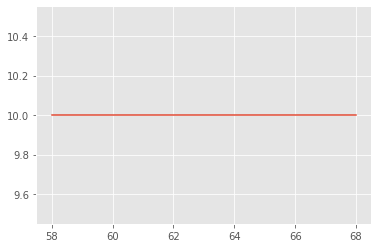

In [21]:
plt.plot(np.arange(58,69),np.mean(ww,axis=(0,2)))
plt.show()

Moments - Women

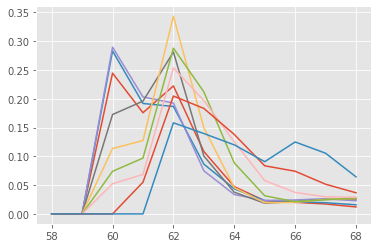

In [22]:
plt.plot(np.arange(58,69),mm[1,:,:9])
plt.show()

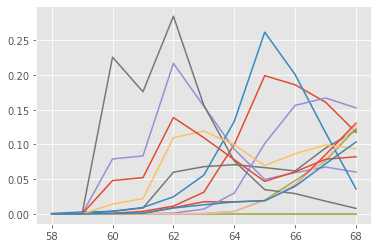

In [23]:
plt.plot(np.arange(58,69),mm[1,:,9:])
plt.show()

Moments - Men

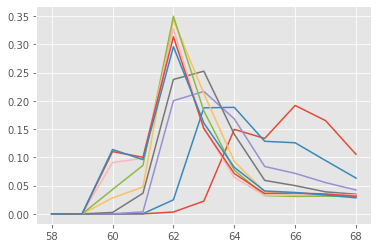

In [24]:
plt.plot(np.arange(58,69),mm[0,:,:9])
plt.show()

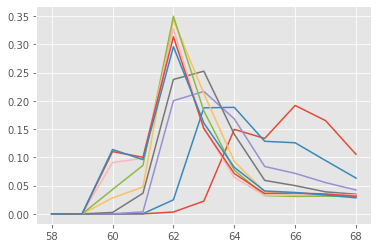

In [25]:
plt.plot(np.arange(58,69),mm[0,:,:9])
plt.show()

### Remove income uncertainty

In [26]:
Couple.par.var[:] = 0
Couple.Single.par.var[:] = 0
Couple.par.Nxi_men = 1
Couple.par.Nxi_women = 1
Couple.Single.par.Nxi = 1
Couple.solve(recompute=True)

In [27]:
est_par = ["alpha_0_male", "alpha_0_female", "phi_0_male", "phi_0_female"]
par_save = est_par[2:]

In [47]:
Couple.par.phi_0_male = 1
Couple.par.alpha_0_male = 0.2
Couple.Single.par.alpha_0_male = 0.2

In [48]:
Couple.par.pareto_w = 100
Couple.solve()
print(np.nansum(Couple.sol.v))

640118101.009339


In [49]:
Couple.par.pareto_w = 0.0
Couple.solve()
print(np.nansum(Couple.sol.v))

640118101.0093383


0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 

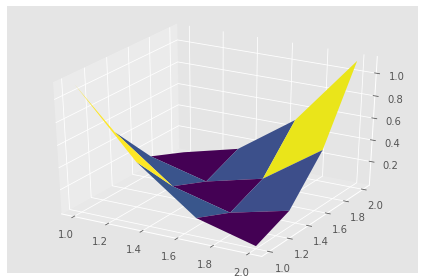

In [39]:
true_par = [0.5, 0.5, 1.5, 1.5]
true_save = true_par[2:]
SMD.identification(Couple,true_par,est_par,true_save,par_save,start=[1,1],end=[2,2],N=4)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

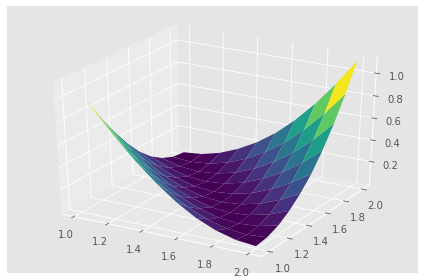

In [161]:
true_par = [0.5, 0.5, 1.5, 1.5]
true_save = true_par[2:]
SMD.identification(Couple,true_par,est_par,true_save,par_save,start=[1,1],end=[2,2],N=10)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

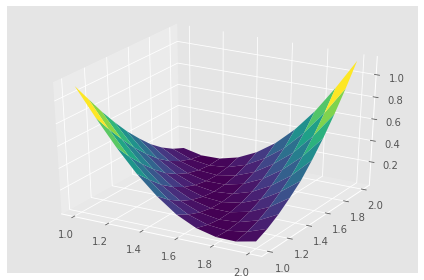

In [162]:
true_par = [0.6, 0.4, 1.5, 1.5]
true_save = true_par[2:]
SMD.identification(Couple,true_par,est_par,true_save,par_save,start=[1,1],end=[2,2],N=10)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 

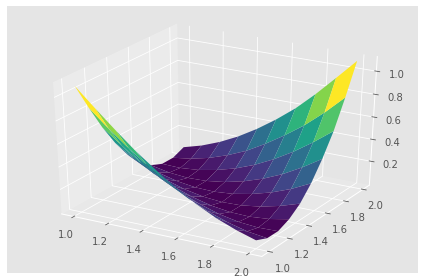

In [163]:
true_par = [0.4, 0.6, 1.5, 1.5]
true_save = true_par[2:]
SMD.identification(Couple,true_par,est_par,true_save,par_save,start=[1,1],end=[2,2],N=10)

In [172]:
true_par = [0.4, 0.6, 1.5, 1.5]
true_save = true_par[2:]
x,y,z = SMD.identification(Couple,true_par,est_par,true_save,par_save,start=[1,1],end=[2,2],N=5,plot=False)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 

In [197]:
a = true_par[0]
b = true_par[1]
Q = a*true_par[2] + b*true_par[3]
x2 = np.linspace(1,2,5)
x1 = (1/a)*(Q-b*x2)
print(a*x1+b*x2)

[1.5 1.5 1.5 1.5 1.5]


In [203]:
true_par = [0.2, 1.0, 1.5, 1.5]
true_save = true_par[2:]
x,y,z = SMD.identification(Couple,true_par,est_par,true_save,par_save,start=[1,1],end=[2,2],N=5,plot=False)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 

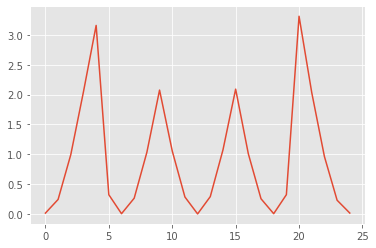

In [204]:
plt.plot(z.ravel())

In [ ]:
0.4

$$
ax + by = Q \iff \\
x = \frac{1}{a} (Q-by)
$$

In [173]:
true_par[0]*x+true_par[1]*y

array([[1.  , 1.1 , 1.2 , 1.3 , 1.4 ],
       [1.15, 1.25, 1.35, 1.45, 1.55],
       [1.3 , 1.4 , 1.5 , 1.6 , 1.7 ],
       [1.45, 1.55, 1.65, 1.75, 1.85],
       [1.6 , 1.7 , 1.8 , 1.9 , 2.  ]])

In [174]:
z

array([[1.08238894, 0.73217362, 0.43084837, 0.19929589, 0.05367259],
       [0.57290589, 0.3027085 , 0.11518595, 0.01375447, 0.0134776 ],
       [0.19728713, 0.05127901, 0.        , 0.04956508, 0.18545859],
       [0.01398123, 0.01306036, 0.10558881, 0.28868288, 0.54918807],
       [0.05027128, 0.18335054, 0.40989866, 0.71584262, 1.10151595]])

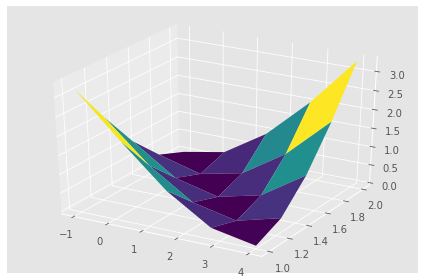

In [205]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x,y,z, cmap='viridis')
fig.tight_layout()

In [122]:
def identification(model,true_par,est_par,true_save,par_save,start,end,N):
    
    # update parameters
    for i in range(len(est_par)):
        setattr(model.par, est_par[i], true_par[i])
        if model.couple and hasattr(model.Single.par,est_par[i]):
            setattr(model.Single.par,est_par[i],true_par[i])            
    
    # data
    def mom_fun(model):
        return SMD.MomFunCouple(model)    
    mom_data = mom_fun(model)
    weight = np.eye(mom_data.size)
    
    # grids
    x1 = np.linspace(start[0],end[0],N)
    x2 = np.linspace(start[0],end[0],N)
    x1,x2 = np.meshgrid(x1,x2)
    x1,x2 = x1.ravel(),x2.ravel()
    
    # estimate
    smd = SMD.SimulatedMinimumDistance(model,mom_data,mom_fun,save=True)
    smd.est_par = par_save
    smd.par_save = {par_save[0]: [], par_save[1]: []}
    for i in range(N*N):
        theta = [x1[i],x2[i]]
        smd.obj_fun(theta,weight)
    
    # reset parameters
    for i in range(len(est_par)):
        setattr(model.par, est_par[i], true_par[i])
        if model.couple and hasattr(model.Single.par,est_par[i]):
            setattr(model.Single.par,est_par[i],true_par[i])                
    
    # return
    return x1.reshape(N,N),x2.reshape(N,N),np.array(smd.obj_save).reshape(N)

In [82]:
mom_data = SMD.MomFunCouple(Couple)
weight = np.eye(mom_data.size)*10

In [83]:
# function to generate moments
def mom_fun(Couple):
    return SMD.MomFunCouple(Couple)

In [84]:
par = Couple.par
true = np.array([par.phi_0_male, par.phi_0_female])
est_par = ["phi_0_male", "phi_0_female"]
smd = SMD.SimulatedMinimumDistance(Couple,mom_data,mom_fun,save=True)
smd.est_par = est_par
smd.par_save = {est_par[0]: [], est_par[1]: []}

In [85]:
N = 4
phiM = np.linspace(0.5,1.5,N)
phiF = np.linspace(0.5,1.5,N)
phiM,phiF = np.meshgrid(phiM,phiF)
phiM,phiF = phiM.ravel(),phiF.ravel()

In [86]:
for i in range(N*N):
    theta = [phiM[i],phiF[i]]
    smd.obj_fun(theta,weight)

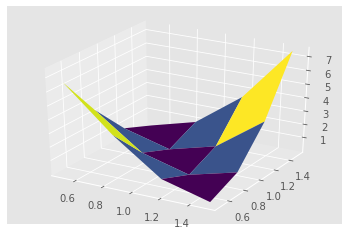

In [88]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(phiM.reshape(N,N),phiF.reshape(N,N),np.array(smd.obj_save).reshape(N,N), cmap='viridis')

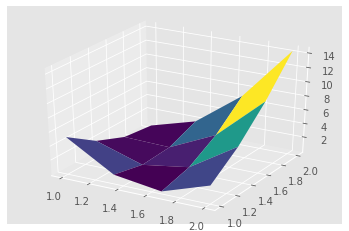

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(phiM.reshape(N,N),phiF.reshape(N,N),np.array(smd.obj_save).reshape(N,N), cmap='viridis')

In [29]:
phiM

array([[0. , 0.5, 1. , 1.5, 2. ],
       [0. , 0.5, 1. , 1.5, 2. ],
       [0. , 0.5, 1. , 1.5, 2. ],
       [0. , 0.5, 1. , 1.5, 2. ],
       [0. , 0.5, 1. , 1.5, 2. ]])

In [30]:
phiM.ravel()

array([0. , 0.5, 1. , 1.5, 2. , 0. , 0.5, 1. , 1.5, 2. , 0. , 0.5, 1. ,
       1.5, 2. , 0. , 0.5, 1. , 1.5, 2. , 0. , 0.5, 1. , 1.5, 2. ])

In [31]:
phiM.ravel().reshape(N,N)

array([[0. , 0.5, 1. , 1.5, 2. ],
       [0. , 0.5, 1. , 1.5, 2. ],
       [0. , 0.5, 1. , 1.5, 2. ],
       [0. , 0.5, 1. , 1.5, 2. ],
       [0. , 0.5, 1. , 1.5, 2. ]])

In [24]:
for i in range(phiM.size):
    print(phiM.ravel()[i])

0.0
0.5
1.0
1.5
2.0
0.0
0.5
1.0
1.5
2.0
0.0
0.5
1.0
1.5
2.0
0.0
0.5
1.0
1.5
2.0
0.0
0.5
1.0
1.5
2.0


### Set up model for estimation

In [11]:
Couple.par.sim_seed = Couple.par.sim_seed + 100 # set new seed
Couple.recompute()
Couple.Single.recompute()

In [12]:
# function to generate moments
def mom_fun(Couple):
    return SMD.MomFunCouple(Couple)

In [13]:
par = Couple.par
true = np.array([par.alpha_0_male, par.alpha_0_female, par.alpha_1, par.sigma_eta, 
                 par.phi_0_male, par.phi_0_female, par.phi_1])

est_par = ["alpha_0_male", "alpha_0_female", "alpha_1", "sigma_eta", "phi_0_male", "phi_0_female", "phi_1"]
smd = SMD.SimulatedMinimumDistance(Couple,mom_data,mom_fun)
smd.est_par = est_par

### Run estimation (only phi)

In [20]:
smd.est_par = est_par
print(smd.obj_fun(true,weight))
smd.est_par = est_par[4:]
print(true[4:])

0.34849453952031473
[ 1.187  1.671 -0.621]


In [15]:
theta0 = SMD.start(3,bounds=[(0.5,1.5), (1.0,2.0),(-1.0,0.0)])
#theta0[0] = list(true[4])

In [16]:
smd.MultiStart(theta0,weight)
theta = smd.est

1 estimation:
success: True | feval: 163 | time: 25.4 min | obj: 0.3865158068158143
start par: [1.388, 1.177, -0.02]
par:       [ 2.24290744 -1.47136821 -0.40429963]

2 estimation:
success: True | feval: 144 | time: 22.8 min | obj: 0.12373744397947398
start par: [1.384, 1.551, -0.183]
par:       [ 1.52070422  0.69452409 -0.57162223]



KeyboardInterrupt: 

In [40]:
theta0 = SMD.start(3,bounds=[(0.5,1.5), (1.0,2.0)])
theta0[0] = list(true[4:6])

In [41]:
smd.MultiStart(theta0,weight)
theta = smd.est

1 estimation:
success: True | feval: 43 | time: 14.0 min | obj: 0.08212750638424876
start par: [1.187, 1.671]
par:       [1.15859308 1.73624698]

2 estimation:
success: True | feval: 67 | time: 22.4 min | obj: 0.08271814434668054
start par: [0.872, 1.437]
par:       [1.12272871 1.79838777]

3 estimation:
success: True | feval: 92 | time: 30.1 min | obj: 0.08426011117002526
start par: [0.781, 1.629]
par:       [1.04743056 1.92138517]



KeyboardInterrupt: 

In [38]:
smd.MultiStart(theta0,weight)
theta = smd.est

1 estimation:
success: True | feval: 32 | time: 5.0 min | obj: 0.12074319913552836
start par: [1.671, -0.621]
par:       [ 1.6756826  -0.61753592]

2 estimation:
success: True | feval: 74 | time: 11.5 min | obj: 0.12085723638493212
start par: [1.98, 0.326]
par:       [ 1.67036536 -0.61263452]

3 estimation:
success: True | feval: 72 | time: 12.7 min | obj: 0.12056963392685105
start par: [1.551, 0.225]
par:       [ 1.67735101 -0.61892024]

final estimation:
success: True | feval: 47 | obj: 0.08236467900526019
total estimation time: 0.8 hours
start par: [ 1.67735101 -0.61892024]
par: [ 1.69129013 -0.6237917 ]



In [41]:
theta0 = SMD.start(10,bounds=[(0.1,1.0), (0.5,1.5), (1.0,2.0), (-1.0,0.5)])
theta0[0] = list(true[3:])

In [42]:
smd.MultiStart(theta0,weight)
theta = smd.est

1 estimation:
success: True | feval: 59 | time: 13.6 min | obj: 0.11215694652993226
start par: [0.435, 1.187, 1.671, -0.621]
par:       [ 0.43851695  1.18421108  1.69634472 -0.61509232]

2 estimation:
success: True | feval: 170 | time: 39.2 min | obj: 0.23545739460718818
start par: [0.596, 1.317, 1.018, -0.19]
par:       [ 0.4286604   2.39715175 -0.35519651 -0.5326822 ]

3 estimation:
success: True | feval: 160 | time: 37.2 min | obj: 0.13834536539264947
start par: [0.295, 0.891, 1.609, 0.448]
par:       [ 0.443242    0.64828397  2.57880456 -0.66680746]

4 estimation:
success: True | feval: 199 | time: 46.1 min | obj: 0.12536945338087774
start par: [0.294, 1.131, 1.332, 0.175]
par:       [ 0.43894076  0.81203579  2.29013147 -0.61895795]

5 estimation:
success: True | feval: 147 | time: 34.5 min | obj: 1.034910874360567
start par: [0.105, 0.707, 1.613, 0.093]
par:       [ 0.43417726  2.05094067 -0.03116493 -0.15723561]

6 estimation:
success: True | feval: 167 | time: 39.5 min | obj: 0.

KeyboardInterrupt: 

In [28]:
smd.MultiStart(theta0,weight)
theta = smd.est

1 estimation:
success: True | feval: 71 | time: 11.8 min | obj: 0.08909697417464882
start par: [0.435, 1.187, 1.671, -0.621]
par:       [ 0.43577031  1.19182069  1.66535186 -0.61876689]

2 estimation:
success: True | feval: 177 | time: 29.5 min | obj: 0.12911771013280068
start par: [0.596, 1.317, 1.018, -0.19]
par:       [ 0.43694799  2.73807658  0.17490381 -0.62549342]

3 estimation:
success: True | feval: 217 | time: 36.2 min | obj: 0.11156791094169441
start par: [0.295, 0.891, 1.609, 0.448]
par:       [ 0.44980829  2.16573264  0.74915491 -0.6137121 ]

4 estimation:
success: True | feval: 159 | time: 26.5 min | obj: 0.09305242684640304
start par: [0.294, 1.131, 1.332, 0.175]
par:       [ 0.43949814  1.50056885  1.3904007  -0.62224382]

5 estimation:
success: True | feval: 220 | time: 36.2 min | obj: 0.1131934568606644
start par: [0.105, 0.707, 1.613, 0.093]
par:       [ 0.44000352 -0.61919339  3.43613689 -0.60328255]

6 estimation:
success: True | feval: 101 | time: 16.8 min | obj: 0

KeyboardInterrupt: 

In [ ]:
print('par :', est_par[3:])
print('bias:', theta-true[3:])

### Run estimation (only alpha)

In [ ]:
Couple.par.simN = int(1e5)
Couple.recompute()
smd.model = Couple

In [ ]:
smd.obj_fun(true[3:],weight) # reset phi to true
smd.est_par = est_par[:4]

In [ ]:
theta0 = SMD.start(10,bounds=[(0.1,1.0), (0.1,1.0), (-0.5,0.5), (0.25,0.5)])
theta0[0] = list(true[:4])

In [ ]:
smd.MultiStart(theta0,weight)
theta = smd.est

In [ ]:
print('par :', est_par[:4])
print('bias:', theta-true[:4])

### Run estimation (all)

In [ ]:
Couple.par.simN = int(1e5)
Couple.recompute()
smd.model = Couple

In [ ]:
smd.est_par = est_par
smd.obj_fun(true,weight) # reset parameters

In [ ]:
theta0 = SMD.start(10,bounds=[(0.2,0.6), (0.2,0.6), (-0.2,0.2), (0.25,0.5), (0.8,1.4), (1.2,2.0), (-0.8,-0.4)])
theta0[0] = list(true)

In [ ]:
#smd.print_iter = [True,100] # print every 100 func eval
smd.MultiStart(theta0,weight)
theta = smd.est

In [ ]:
print('par :', est_par)
print('bias:', theta-true)